In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

from utils import plot_images_full, generate_matrix, batch_dirichlet, get_similarities, plot_similarities, get_differences, plot_differences, get_images, plot_images

#from models.vit import ViT, SimpleViT, SimpleViTI, SimpleViTFT
from models.diffusion import SimpleTransformer

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
batch_size = 32
size = (3,32,32)
patch_size = 8
depth = 128
device = 'cpu'
data_path = './data/'

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=data_path, train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_path, train=False,
                                       download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
image = next(iter(val_loader))[0].to(device)

In [5]:
#plt.imshow(A0[0,:].reshape(32,32))

## $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [10]:
model = SimpleTransformer(size, patch_size, depth, 
                          dim=128, 
                          heads=1,
                          num_classes=10, 
                          sign=0, 
                          tau=1, 
                          embed=True,
                          softw=False,
                          weight_sharing=True, 
                          method='A',
                          norm=False)

In [11]:
outputs, attentions = model.diffuse(image)

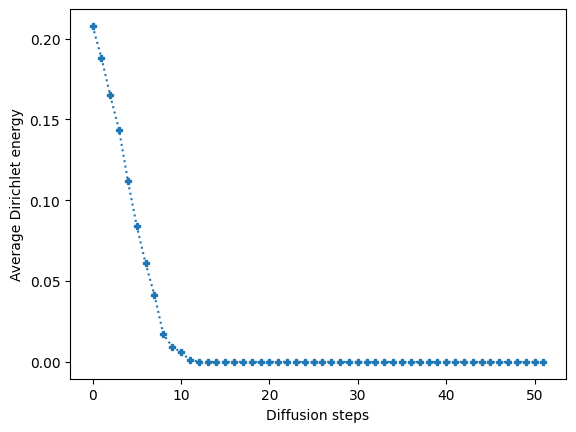

In [12]:
dirichlet_input = [x/(np.linalg.norm(x)+1e-9) for x in outputs]
similarities = get_similarities(dirichlet_input)
plot_similarities(similarities)

/home/gbetondji/smoothtransformer/utils.py:63: RuntimeWarning: invalid value encountered in double_scalars
  differences.append(np.linalg.norm(outputs[k+1])/(np.linalg.norm(outputs[k])+1e-9))


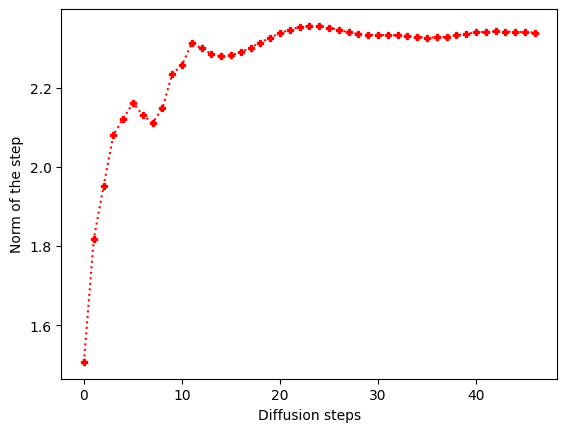

In [13]:
attentions = [x[0][0].reshape((1,4,4)) for x in attentions]

differences = get_differences(outputs)
plot_differences(differences)

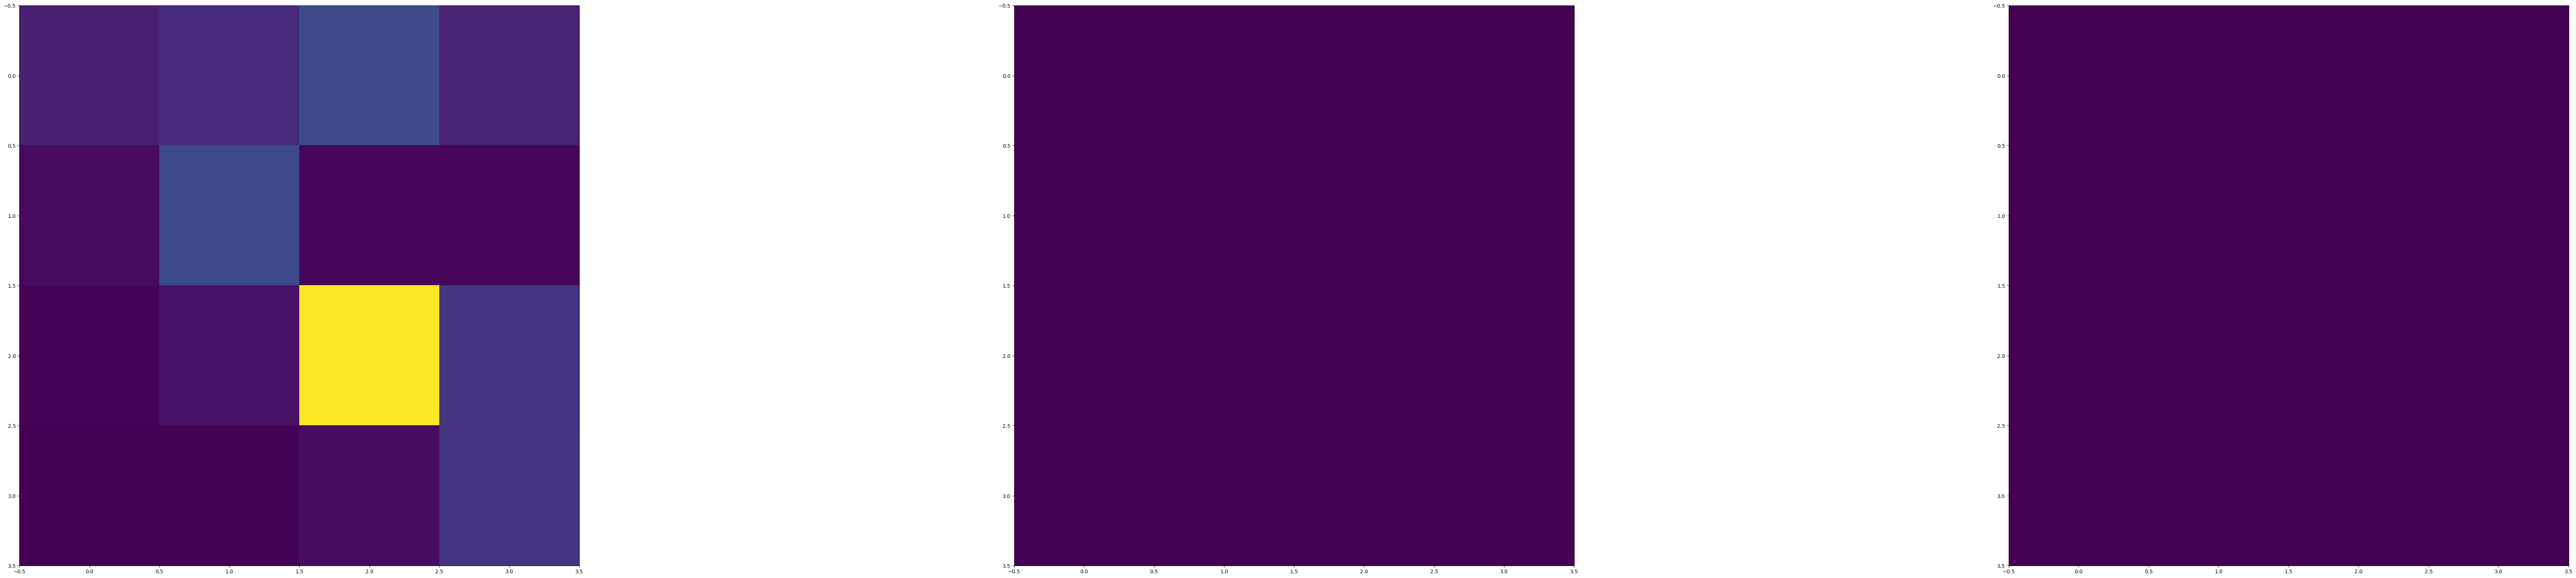

In [30]:
plot_images_full([attentions[0],attentions[32],attentions[-1]])

## $\mathbf{F}(t+1) = \tau \bar{\mathbf{A}}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [12]:
model = SimpleTransformer(size, depth, 10, sign=-1, tau=1, weight_sharing=True, method='I',stdev=0.01)

In [13]:
outputs, attentions = model.diffuse(image)

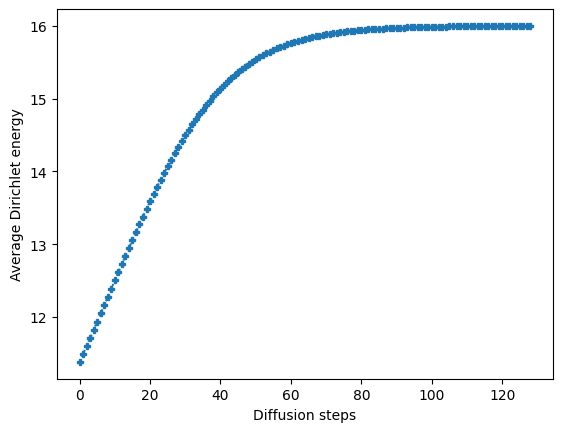

In [14]:
dirichlet_input = [x/(np.linalg.norm(x)+1e-9) for x in outputs]
similarities = get_similarities(dirichlet_input)
plot_similarities(similarities)

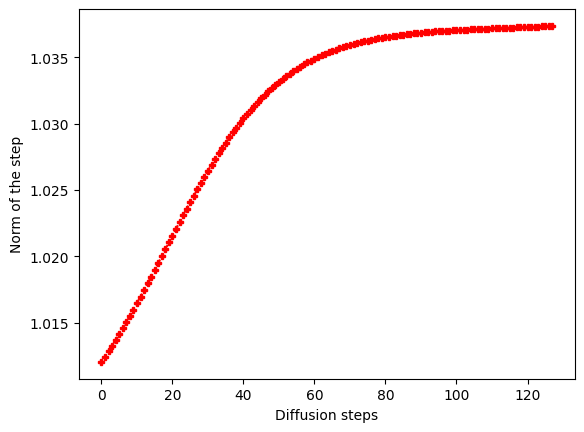

In [15]:
attentions = [x[0][0].reshape((1,32,32)) for x in attentions]

differences = get_differences(outputs)
plot_differences(differences)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


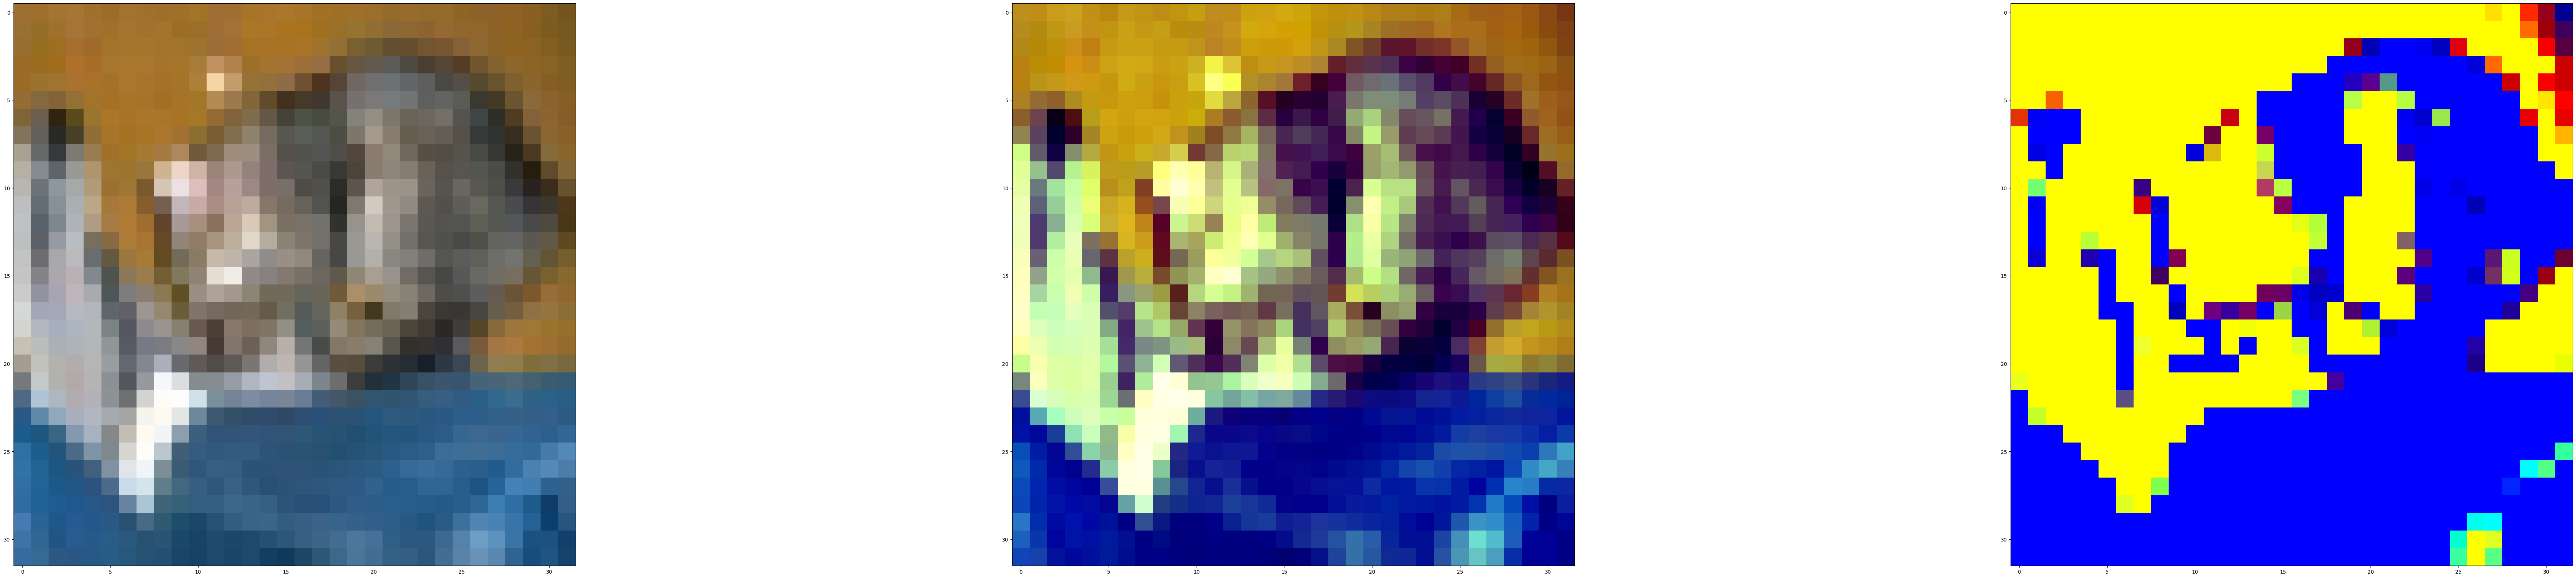

In [16]:
images = get_images(outputs)
plot_images_full([images[0],images[32],images[-1]])

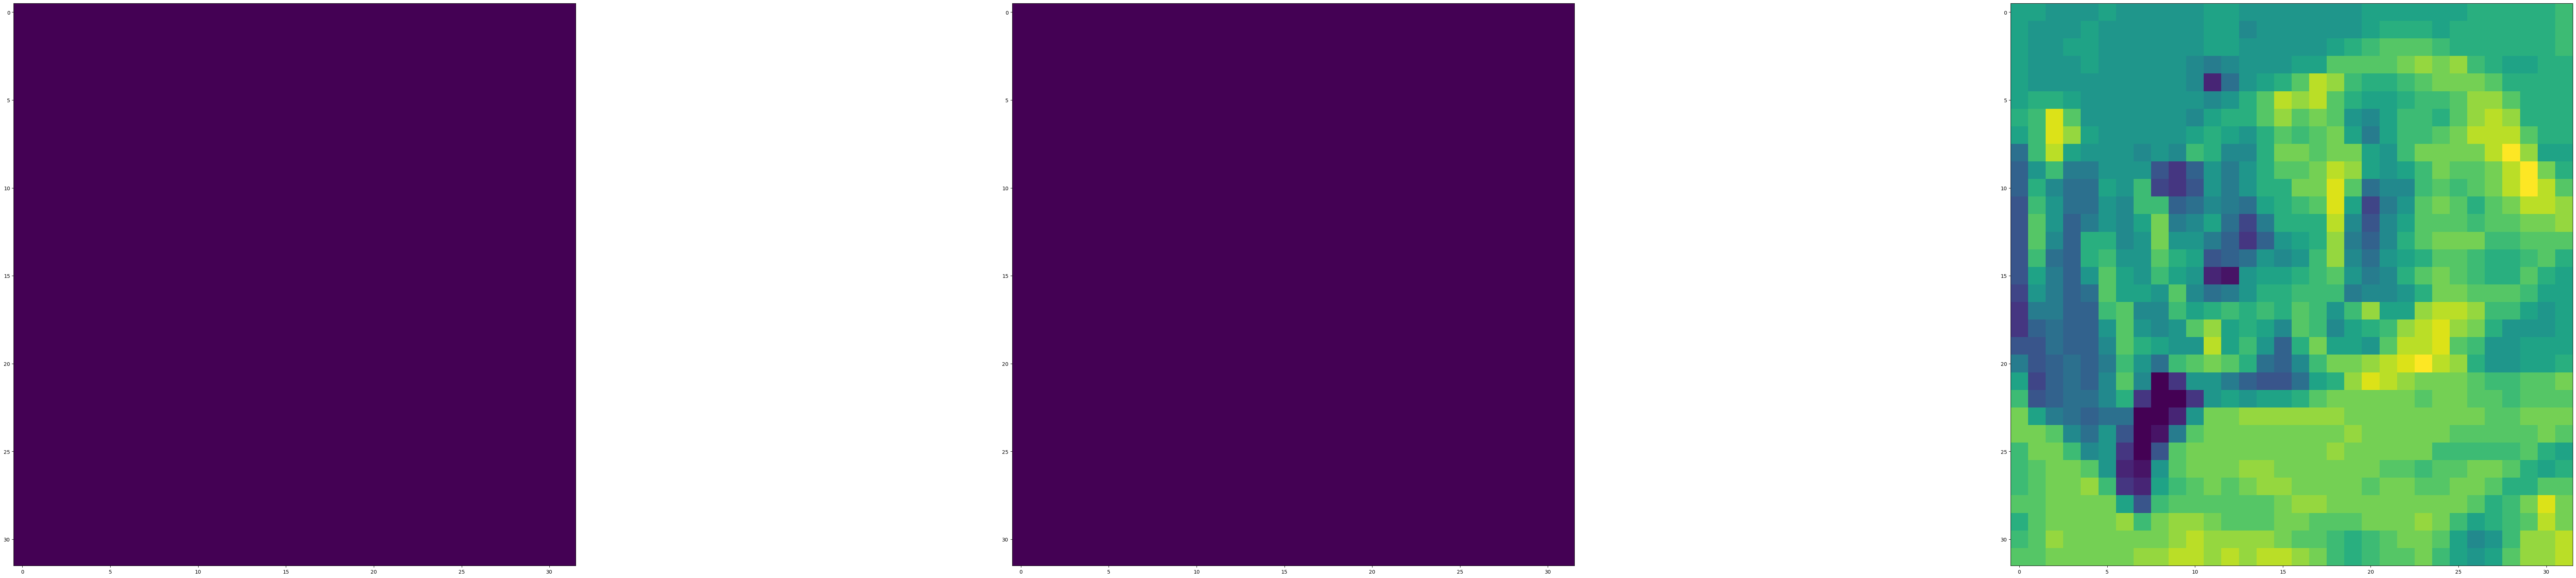

In [17]:
plot_images_full([attentions[0],attentions[32],attentions[-1]])

## $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + (1 - \tau) \mathbf{F}(t)$

In [18]:
model = SimpleTransformer(size, depth, 10, sign=-1, tau=0.1, weight_sharing=True, method='FT',stdev=0.01,softw=True)

In [26]:
W = 0.5*(WV+WV.T)
W = -1 * W@W.T

In [27]:
torch.linalg.eig(W).eigenvalues

tensor([-0.0115+0.j, -0.0333+0.j, -0.0311+0.j], grad_fn=<LinalgEigBackward0>)

In [28]:
W = torch.nn.functional.softmax(W, -1)

In [29]:
torch.linalg.eig(W).eigenvalues

tensor([ 1.0000+0.j, -0.0044+0.j, -0.0103+0.j], grad_fn=<LinalgEigBackward0>)

In [19]:
outputs, attentions = model.diffuse(image)

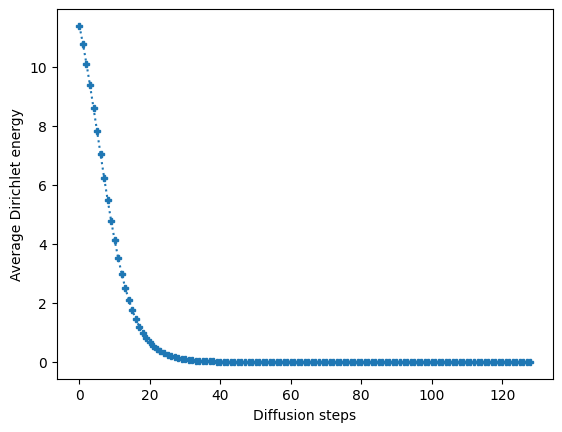

In [20]:
dirichlet_input = [x/(np.linalg.norm(x)+1e-9) for x in outputs]
similarities = get_similarities(dirichlet_input)
plot_similarities(similarities)

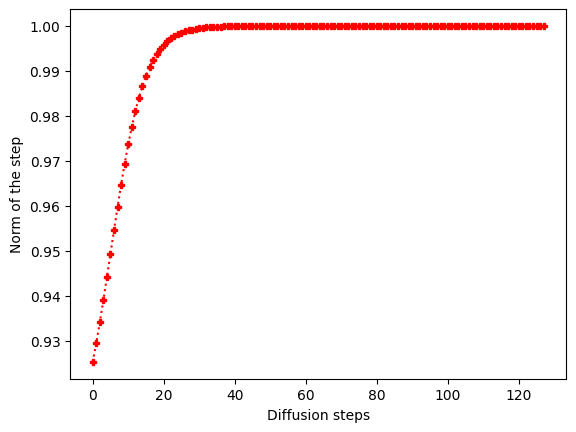

In [21]:
attentions = [x[0][0].reshape((1,32,32)) for x in attentions]

differences = get_differences(outputs)
plot_differences(differences)

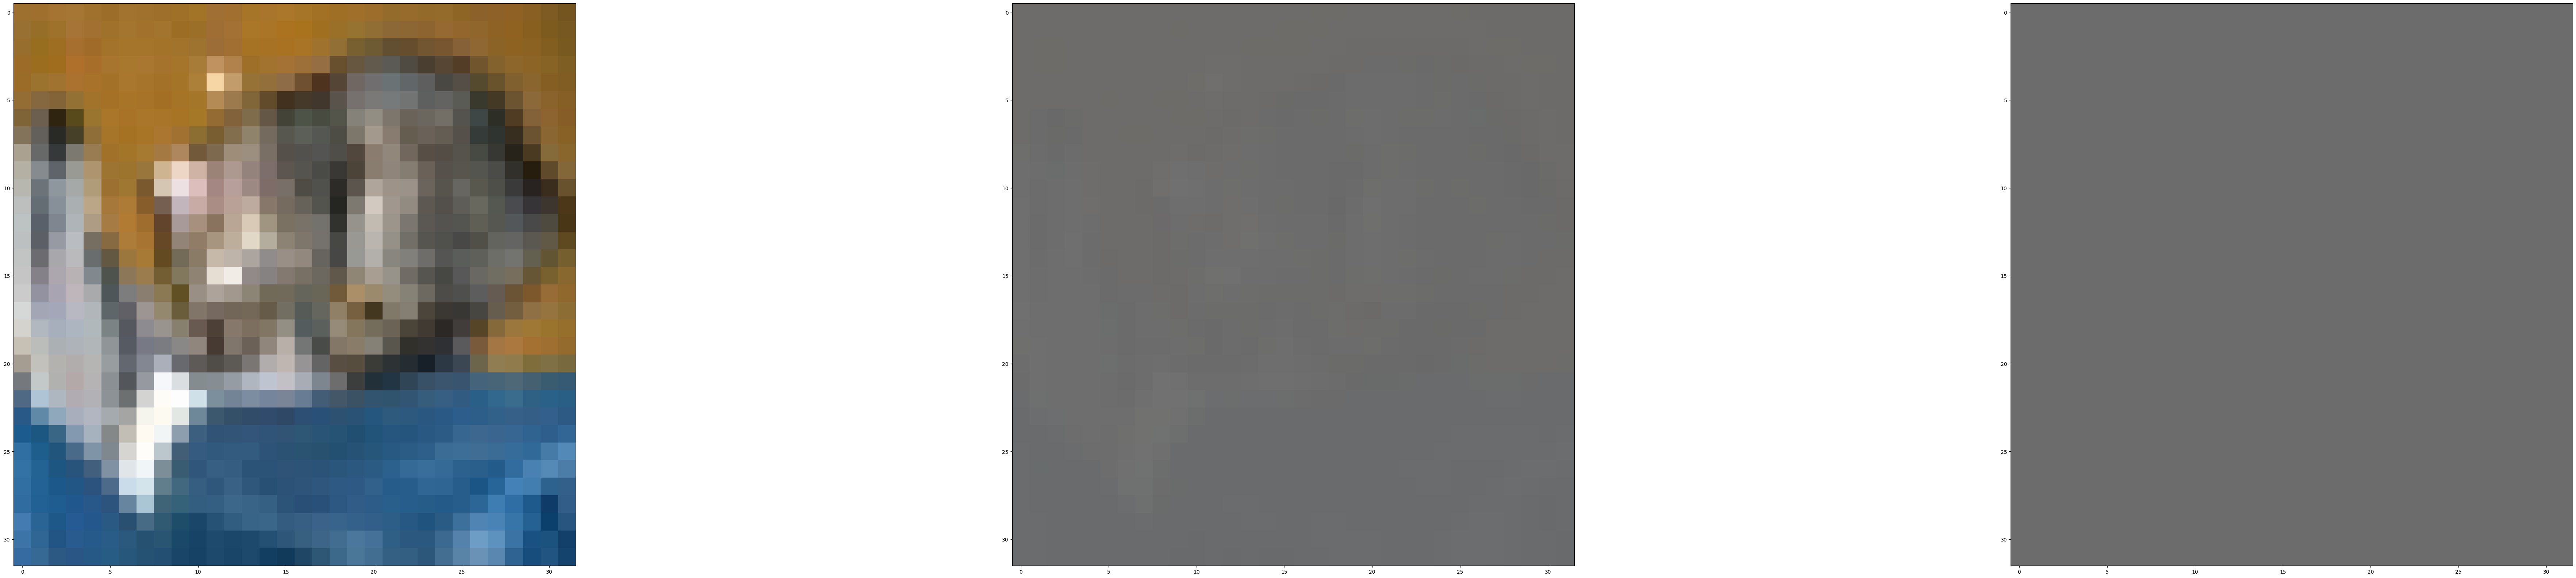

In [22]:
images = get_images(outputs)
plot_images_full([images[0],images[32],images[-1]])

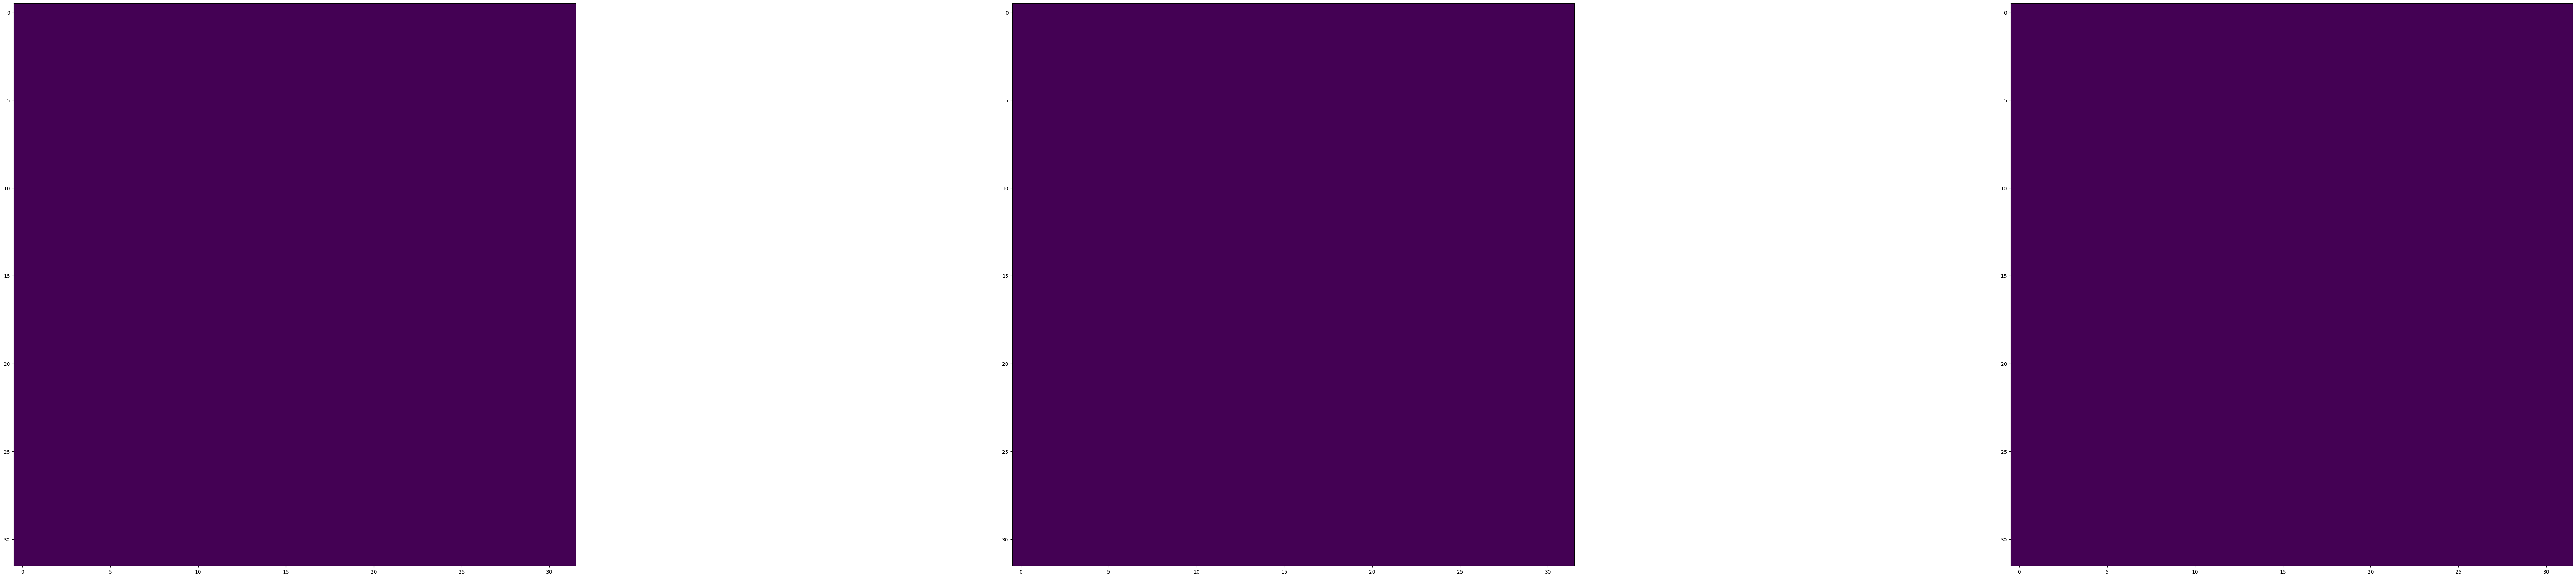

In [23]:
plot_images_full([attentions[0],attentions[32],attentions[-1]])